In [2]:
pip install librosa soundfile numpy sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import librosa
import os
import glob
import soundfile
import scipy
import time
import numpy as np
import pandas as pd

 ## Loading Audio Files
 This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [4]:
import librosa 
import librosa.display
%matplotlib inline 
# backend-frontend
import matplotlib.pyplot as plt

audio=r"C:\Users\Sahithi Sarika\OneDrive\Desktop\SER\Ravdess emotional speech set data\Actor_01\03-01-01-01-01-01-01.wav"
x,sampling_rate=librosa.load(audio) #librosa.load returns 2parameters ie data and SR
print(type(x))
print(type(sampling_rate))

<class 'numpy.ndarray'>
<class 'int'>


In [5]:
print(x)

[0. 0. 0. ... 0. 0. 0.]


In [6]:
print(sampling_rate)

22050


In [7]:
x.shape #it means it has those many amt of samples in that waveform

(72839,)

In [8]:
import IPython.display as Ipd #IPython. display. Audio lets you play audio directly in an IPython notebook.
Ipd.Audio(audio)

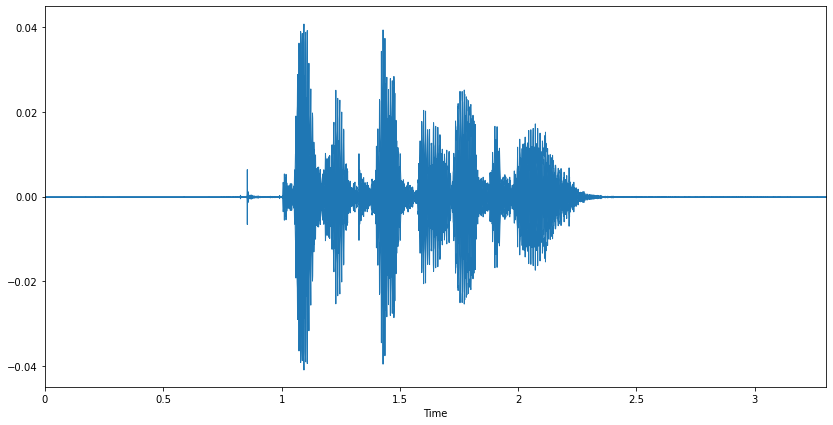

In [9]:
# plot audio using waveplot function of librosa.plots amplitude envelope of waveform
# (Amplitude envelope refers to the changes in the amplitude of a sound over time)
plt.figure(figsize=(14,7)) #takes two parameters- width and height (in inches)
librosa.display.waveplot(x,sr=sampling_rate)

## SCIPY PACKAGE

In [9]:
from scipy.io import wavfile as wav
samplerate,audio_data=wav.read(audio)
print(samplerate)
print(audio_data)

16000
[0 0 0 ... 0 0 0]


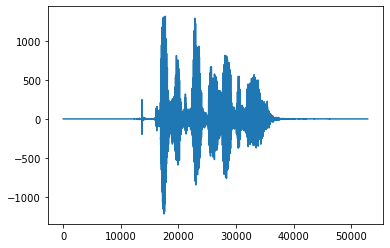

In [10]:
a=plt.plot(audio_data)
a

## DISPLAYING SPECTOGRAM

In [11]:
audio1=r"C:\Users\Sahithi Sarika\OneDrive\Desktop\SER\Ravdess emotional speech set data\Actor_01\03-01-01-01-01-02-01.wav"
audio2=r"C:\Users\Sahithi Sarika\OneDrive\Desktop\SER\Ravdess emotional speech set data\Actor_01\03-01-04-01-01-01-01.wav"
x1,sr1=librosa.load(audio1)
x2,sr2=librosa.load(audio2)

In [12]:
Ipd.Audio(audio1)

In [13]:
Ipd.Audio(audio2)

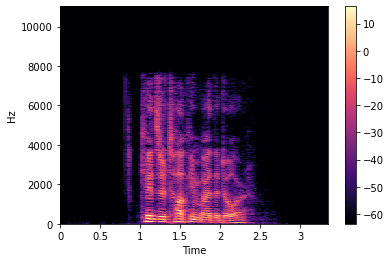

In [14]:
X=librosa.stft(x1) # stft used to determine frequencies playing at given time of audio signal.
xdb=librosa.amplitude_to_db(abs(X))
librosa.display.specshow(xdb,sr=sr1,x_axis='time',y_axis='hz')#We can display a spectrogram using librosa.display.specshow.
plt.colorbar() #Add a colorbar to a plot.

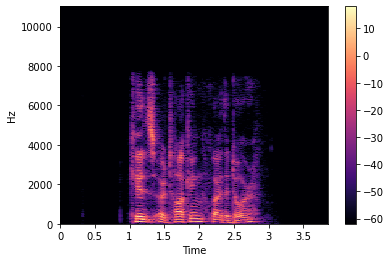

In [15]:
X=librosa.stft(x2)
xdb=librosa.amplitude_to_db(abs(X))
librosa.display.specshow(xdb,sr=sr2,x_axis='time',y_axis='hz')
plt.colorbar()

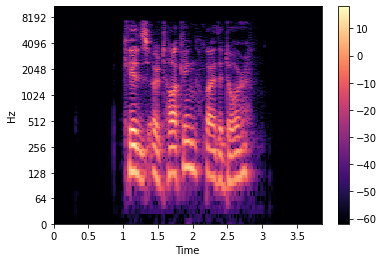

In [16]:
librosa.display.specshow(xdb, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

## FEATURE EXTRACTION
### Dependent features(class labels) and independent features need to be extracted
   - Dependent and independent features need to be extracted.
    
   - Extracting MFCC from audio to analyse the frequency and characteristics of sound #characteristics of sound waves: wavelength, amplitude, frequency, time period, and velocity.

In [17]:
mfccs=librosa.feature.mfcc(y=x2,sr=sr1,n_mfcc=40) #n_mfcc is cepstral coefficients
print(mfccs.shape)

(40, 166)


#### Selecting the emotions to be classified. Note that the emotions 'neutral', 'calm' and 'surprised' are only found in RAVDESS dataset and 'pleasantly surprised' or 'ps' is only available in TESS dataset.

####  To combine all the emotions from both datasets into 8 emotion classes, we have changed 'pleasantly surprised' to 'surprised' and 'fearful' to 'fear'

In [18]:
mfccs

array([[-849.36005, -849.36005, -849.36005, ..., -849.36005, -849.36005,
        -849.36005],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [10]:

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

#### Selecting the emotions to be classified. Note that the emotions 'neutral', 'calm' and 'surprised' are only found in RAVDESS dataset and 'pleasantly surprised' or 'ps' is only available in TESS dataset. 

#### To combine all the emotions from both datasets into 8 emotion classes, we have changed 'pleasantly surprised' to 'surprised' and 'fearful' to 'fear'

In [12]:
#defined TESS emotions to test on TESS dataset only
tess_emotions=['neutral','happy','sad','angry','fear','disgust','ps']

#defined RAVDESS emotions to test on RAVDESS dataset only
ravdess_emotions=['neutral','calm','happy','sad','angry','fear','disgust','surprised']


#final emotions given by us to observe and match with the data 
observed_emotions = ['neutral','calm','happy','sad','angry','fear','disgust','surprised']

In [25]:
 def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    result=np.array([])
    if chroma:
        stft=np.abs(librosa.stft(X))
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    #print(result)
    return result

# Choosing a dataset

In [14]:
def dataset_options():
    ravdess=True
    tess=True
    ravdess_speech=False
    ravdess_song=False
    data={'ravdess':ravdess,'tess':tess,'ravdess_speech':ravdess_speech,'ravdess_song':ravdess_song}
    print("Datasets used are : ",data)
    return data

## Speech to text

In [26]:
import speech_recognition as srn
r=srn.Recognizer()
for file in glob.glob("C:\\Users\\DIVYA\\Downloads\\RAVDESS\\Actor_01\\*.wav"):
    with srn.AudioFile(file) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

# LOAD DATA:
- Extract features from each file in chosen datasets using the extract_feature() function defined.

In [15]:
def load_data():
    x,y=[],[]
    c,c1=0,0
    mfcc=True
    chroma=True
    mel=True
    
    data=dataset_options()
    if data['ravdess']:
        for file in glob.glob(r"C:\Users\Sahithi Sarika\OneDrive\Desktop\SER\Ravdess emotional speech set data\Actor_*\*.wav"):
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]] #to get emotion from emotions dictionary using key
            
            if emotion not in observed_emotions:
                continue
            feature=extract_feature(file,mfcc,chroma,mel)
            c=c+1
            x.append(feature)
            y.append(emotion)
            
    if data['tess']:
        for file in glob.glob(r"C:\Users\Sahithi Sarika\OneDrive\Desktop\SER\TESS Toronto emotional speech set data\*AF_*\*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            

            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions:
                continue

            feature=extract_feature(file, mfcc,chroma,mel)
            c1=c1+1
            #print(feature)
            x.append(feature)
            y.append(emotion)
    print("Total files in ravdess dataset : ",c)
    print("Total files in tess dataset : ",c1)
    return {"X":x,"Y":y}
    

In [16]:
starting_time=time.time()
trial_dict=load_data()

print(" DATA LOADED SUCCESSFULLY .Loading time : %s seconds ---" % (time.time() - starting_time))

Datasets used are :  {'ravdess': True, 'tess': True, 'ravdess_speech': False, 'ravdess_song': False}
Total files in ravdess dataset :  1440
Total files in tess dataset :  2800
 DATA LOADED SUCCESSFULLY .Loading time : 209.67601203918457 seconds ---


In [17]:
X=pd.DataFrame(trial_dict["X"])
Y=pd.DataFrame(trial_dict["Y"])
print(X.shape,Y.shape)

(4240, 180) (4240, 1)


In [18]:
data=pd.concat([X,Y],axis=1) #1 means columns 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,0
0,-707.226318,68.469788,-11.611320,22.716902,-0.303072,5.822211,-6.081500,-2.655389,-9.960321,-5.103168,...,7.123859e-13,4.828430e-13,8.118721e-13,1.687647e-12,3.500356e-12,1.881162e-12,3.081991e-12,2.206314e-12,6.977832e-13,neutral
1,-703.383240,70.197769,-15.213277,27.412649,-0.247905,5.837488,-4.831208,-4.569034,-10.607910,-3.820005,...,8.663430e-13,5.532387e-13,1.016019e-12,1.739981e-12,4.027293e-12,2.397221e-12,4.418747e-12,2.542645e-12,7.244875e-13,neutral
2,-700.794006,70.959595,-11.694939,23.595743,-2.463483,6.388802,-5.021149,-4.631995,-9.482592,-5.633955,...,1.411940e-12,1.064589e-12,2.310054e-12,3.802464e-12,5.353037e-12,3.087828e-12,5.164499e-12,3.851312e-12,2.595323e-12,neutral
3,-694.826050,69.669205,-9.815083,23.888597,-1.381263,8.620013,-4.805181,-6.055672,-9.544140,-5.380029,...,1.590781e-12,1.339222e-12,2.484888e-12,3.250877e-12,3.961606e-12,2.927518e-12,4.272339e-12,3.753536e-12,2.238689e-12,neutral
4,-737.437988,77.273209,-11.190391,26.755884,-1.537418,8.085284,-7.015995,-3.006230,-8.947398,-7.313802,...,3.630840e-13,2.121317e-13,3.764892e-13,5.853325e-13,2.479844e-12,1.447206e-12,2.363926e-12,1.182290e-12,4.276118e-13,calm


In [19]:
Y

,0
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
...,...
4235,sad
4236,sad
4237,sad
4238,sad


In [20]:
x

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [21]:
y=Y.rename(columns={0:'Emotion'})

In [22]:
data = pd.concat([X, y], axis =1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Emotion
0,-707.226318,68.469788,-11.611320,22.716902,-0.303072,5.822211,-6.081500,-2.655389,-9.960321,-5.103168,...,7.123859e-13,4.828430e-13,8.118721e-13,1.687647e-12,3.500356e-12,1.881162e-12,3.081991e-12,2.206314e-12,6.977832e-13,neutral
1,-703.383240,70.197769,-15.213277,27.412649,-0.247905,5.837488,-4.831208,-4.569034,-10.607910,-3.820005,...,8.663430e-13,5.532387e-13,1.016019e-12,1.739981e-12,4.027293e-12,2.397221e-12,4.418747e-12,2.542645e-12,7.244875e-13,neutral
2,-700.794006,70.959595,-11.694939,23.595743,-2.463483,6.388802,-5.021149,-4.631995,-9.482592,-5.633955,...,1.411940e-12,1.064589e-12,2.310054e-12,3.802464e-12,5.353037e-12,3.087828e-12,5.164499e-12,3.851312e-12,2.595323e-12,neutral
3,-694.826050,69.669205,-9.815083,23.888597,-1.381263,8.620013,-4.805181,-6.055672,-9.544140,-5.380029,...,1.590781e-12,1.339222e-12,2.484888e-12,3.250877e-12,3.961606e-12,2.927518e-12,4.272339e-12,3.753536e-12,2.238689e-12,neutral
4,-737.437988,77.273209,-11.190391,26.755884,-1.537418,8.085284,-7.015995,-3.006230,-8.947398,-7.313802,...,3.630840e-13,2.121317e-13,3.764892e-13,5.853325e-13,2.479844e-12,1.447206e-12,2.363926e-12,1.182290e-12,4.276118e-13,calm


In [23]:
y

,Emotion
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
...,...
4235,sad
4236,sad
4237,sad
4238,sad


In [24]:
x

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

### Storing these data of the dataframe in an excel sheet to avoid loading again and again

In [33]:
data = data.reindex(np.random.permutation(data.index))
data.to_csv("RAVDESS,TESS_mfcc_chroma_mel")

### DATA PREPROCESSING 
   - converting last col to numerical values

In [34]:
dataframe=pd.read_csv(r"C:\Users\Sahithi Sarika\OneDrive\Desktop\SER\RAVDESS,TESS_mfcc_chroma_mel.csv")

In [35]:
from sklearn.preprocessing import LabelEncoder
dataframe['Emotion']=LabelEncoder().fit_transform(dataframe['Emotion'])

In [36]:
dataframe['Emotion']

0       2
1       7
2       3
3       6
4       3
       ..
4235    0
4236    0
4237    0
4238    4
4239    5
Name: Emotion, Length: 4240, dtype: int32

In [37]:
dataframe.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,171,172,173,174,175,176,177,178,179,Emotion
0,1737,-465.585449,83.555794,7.898191,1.845573,9.589481,16.620991,-18.170990,8.031609,-16.714731,...,1.614745e-04,1.489774e-04,1.082331e-04,7.832934e-05,3.076414e-05,9.439812e-06,2.091660e-06,2.957747e-07,2.364530e-08,2
1,358,-608.932800,56.456070,-45.398525,17.257446,-18.685335,-6.954247,-19.358278,-15.089822,-4.008198,...,9.919672e-12,9.638627e-12,3.004074e-11,2.009821e-11,1.407661e-11,1.301384e-11,1.577758e-11,2.411851e-11,2.308979e-11,7
2,277,-668.708923,66.747795,-11.002393,24.854563,-3.741007,2.820232,-6.700864,-2.206323,-1.440481,...,3.368504e-12,3.332721e-12,7.175953e-12,4.500260e-12,5.371889e-12,3.719719e-12,5.621874e-12,5.378570e-12,5.130835e-12,3
3,2757,-545.600830,85.160782,26.692595,29.094379,15.003597,12.542657,-19.132849,-3.636678,-15.840714,...,5.446315e-05,1.059334e-05,5.718410e-06,3.124374e-06,2.469191e-06,1.688812e-06,3.057819e-07,5.100989e-08,4.805832e-09,6
4,3432,-324.575592,43.163139,-24.836311,23.449015,-16.303528,-1.034032,-9.414081,3.486397,-15.959109,...,5.275351e-03,6.099407e-03,4.937004e-03,4.090378e-03,7.883835e-04,2.051225e-04,8.221862e-05,3.210119e-05,3.558323e-06,3


In [38]:
dataframe=dataframe.iloc[:,1:]
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Emotion
0,-465.585449,83.555794,7.898191,1.845573,9.589481,16.620991,-18.170990,8.031609,-16.714731,7.079723,...,1.614745e-04,1.489774e-04,1.082331e-04,7.832934e-05,3.076414e-05,9.439812e-06,2.091660e-06,2.957747e-07,2.364530e-08,2
1,-608.932800,56.456070,-45.398525,17.257446,-18.685335,-6.954247,-19.358278,-15.089822,-4.008198,-3.471641,...,9.919672e-12,9.638627e-12,3.004074e-11,2.009821e-11,1.407661e-11,1.301384e-11,1.577758e-11,2.411851e-11,2.308979e-11,7
2,-668.708923,66.747795,-11.002393,24.854563,-3.741007,2.820232,-6.700864,-2.206323,-1.440481,-3.329082,...,3.368504e-12,3.332721e-12,7.175953e-12,4.500260e-12,5.371889e-12,3.719719e-12,5.621874e-12,5.378570e-12,5.130835e-12,3
3,-545.600830,85.160782,26.692595,29.094379,15.003597,12.542657,-19.132849,-3.636678,-15.840714,7.847837,...,5.446315e-05,1.059334e-05,5.718410e-06,3.124374e-06,2.469191e-06,1.688812e-06,3.057819e-07,5.100989e-08,4.805832e-09,6
4,-324.575592,43.163139,-24.836311,23.449015,-16.303528,-1.034032,-9.414081,3.486397,-15.959109,8.463060,...,5.275351e-03,6.099407e-03,4.937004e-03,4.090378e-03,7.883835e-04,2.051225e-04,8.221862e-05,3.210119e-05,3.558323e-06,3


SPLITTING THE DATA

In [39]:
y=dataframe[["Emotion"]]
x=dataframe.drop("Emotion",axis=1)
print(x.shape)

(4240, 180)


In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=4)

In [41]:
print(xtrain.shape,xtest.shape)

(2968, 180) (1272, 180)


In [42]:
print(ytest.shape,ytrain.shape)

(1272, 1) (2968, 1)


DECISION TREE CLASSIFIER

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [73]:
predictions = dtree.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,predictions))


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       175
           1       0.40      0.54      0.46        52
           2       0.65      0.69      0.67       182
           3       0.73      0.76      0.74       179
           4       0.67      0.61      0.64       183
           5       0.85      0.85      0.85       148
           6       0.82      0.72      0.77       190
           7       0.67      0.71      0.69       163

    accuracy                           0.71      1272
   macro avg       0.69      0.70      0.70      1272
weighted avg       0.72      0.71      0.72      1272



In [45]:
dtree.score(xtest,ytest)*100

71.4622641509434

In [69]:
pip install helper

Note: you may need to restart the kernel to use updated packages.


In [72]:
import math
import random
from include import helpers
accuracies = helpers.acc_per_class(confusion_matrix(ytest,predictions))

pd.DataFrame({
    'CLASS': labels,
    'ACCURACY': accuracies
}).sort_values(by="ACCURACY", ascending=False)

ImportError: cannot import name 'helpers' from 'include' (unknown location)

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predictions))

[[129   0   7  15  12   0   3   9]
 [  1  28   2   0   2   6   8   5]
 [  8   6 126   8  13   2   5  14]
 [  7   5  12 136   7   2   6   4]
 [ 16   7  15  10 112   4   4  15]
 [  0   5   3   2   3 126   5   4]
 [  3  18  11   7   3   6 137   5]
 [  3   1  17   9  16   2   0 115]]


In [61]:
xtest

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
2497,-454.373596,72.805046,-6.457813,28.168310,-9.832465,5.950577,-13.219358,-5.454825,-7.691240,4.467302,...,1.758514e-03,2.090446e-03,2.152915e-03,1.464990e-03,3.527417e-04,1.417203e-04,8.350430e-05,2.348676e-05,4.243553e-06,3.437414e-07
3082,-463.416992,76.897041,2.608249,7.732314,-1.044235,4.212634,-21.901829,8.550930,-19.095825,1.690433,...,2.534020e-04,3.641787e-04,3.361144e-04,1.998819e-04,1.310438e-04,7.399500e-05,2.606931e-05,4.991007e-06,7.055020e-07,6.950003e-08
2541,-414.976532,65.481972,-12.458680,32.005085,-11.457415,3.216745,-6.906455,-8.509661,-9.436650,12.962865,...,2.179181e-03,3.002104e-03,2.238560e-03,2.382903e-03,6.373914e-04,1.841619e-04,8.647495e-05,2.253323e-05,3.705909e-06,4.979537e-07
3742,-496.077423,89.104454,-0.818973,2.486541,2.569937,16.452793,-14.449226,-2.296064,-19.418819,6.132815,...,1.232961e-04,1.022212e-04,4.600351e-05,2.483284e-05,1.563388e-05,6.140444e-06,1.734441e-06,4.741295e-07,9.027372e-08,9.769612e-09
3869,-812.875244,98.790352,-13.284754,45.717308,1.256658,22.359472,-5.524738,-6.484338,1.115039,-1.344838,...,2.737908e-14,1.390454e-14,9.138157e-15,1.120212e-14,2.228990e-14,1.175080e-13,8.815142e-14,1.018528e-13,5.287152e-14,1.202426e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,-731.920532,87.196602,-6.873734,27.835461,-0.623532,12.640319,-6.602000,-0.245552,-1.036077,0.285539,...,7.079524e-13,5.738951e-13,5.023523e-13,1.190947e-12,1.225678e-12,2.211349e-12,1.478838e-12,2.247405e-12,1.397497e-12,1.079035e-12
3022,-424.025116,86.201706,-2.403748,41.960468,-14.248897,1.294329,-6.197645,-12.778934,-17.364407,-3.105549,...,2.909406e-03,2.868306e-03,3.045621e-03,2.781363e-03,1.201714e-03,1.621662e-04,8.478013e-05,4.339426e-05,9.098951e-06,1.861878e-06
430,-404.040619,79.663696,-12.835503,27.605698,-13.007808,2.357724,-3.395784,-4.121532,-8.100678,12.636605,...,3.094101e-03,4.400398e-03,4.117502e-03,2.150665e-03,9.486979e-04,1.370338e-04,4.870131e-05,1.625342e-05,5.483085e-06,5.699412e-07
2272,-692.723877,48.686375,-19.600634,14.825533,-19.064665,2.584088,-12.163838,-7.087744,-5.777852,-9.471619,...,1.297446e-12,1.138043e-12,9.899657e-13,2.178987e-12,1.528338e-12,5.087808e-12,1.183708e-12,5.588630e-12,4.091739e-12,1.389398e-12


In [48]:
ytest

,Emotion
2497,2
3082,4
2541,5
3742,5
3869,6
...,...
1096,2
3022,2
430,5
2272,7


In [49]:
u=dtree.predict(xtest.iloc[127,:].to_frame().transpose())#to_frame() function is used to convert the given series object to a dataframe. 
print(u)

[1]


In [50]:
ytest.iloc[127]

Emotion    3
Name: 3370, dtype: int32

In [51]:
from sklearn import tree

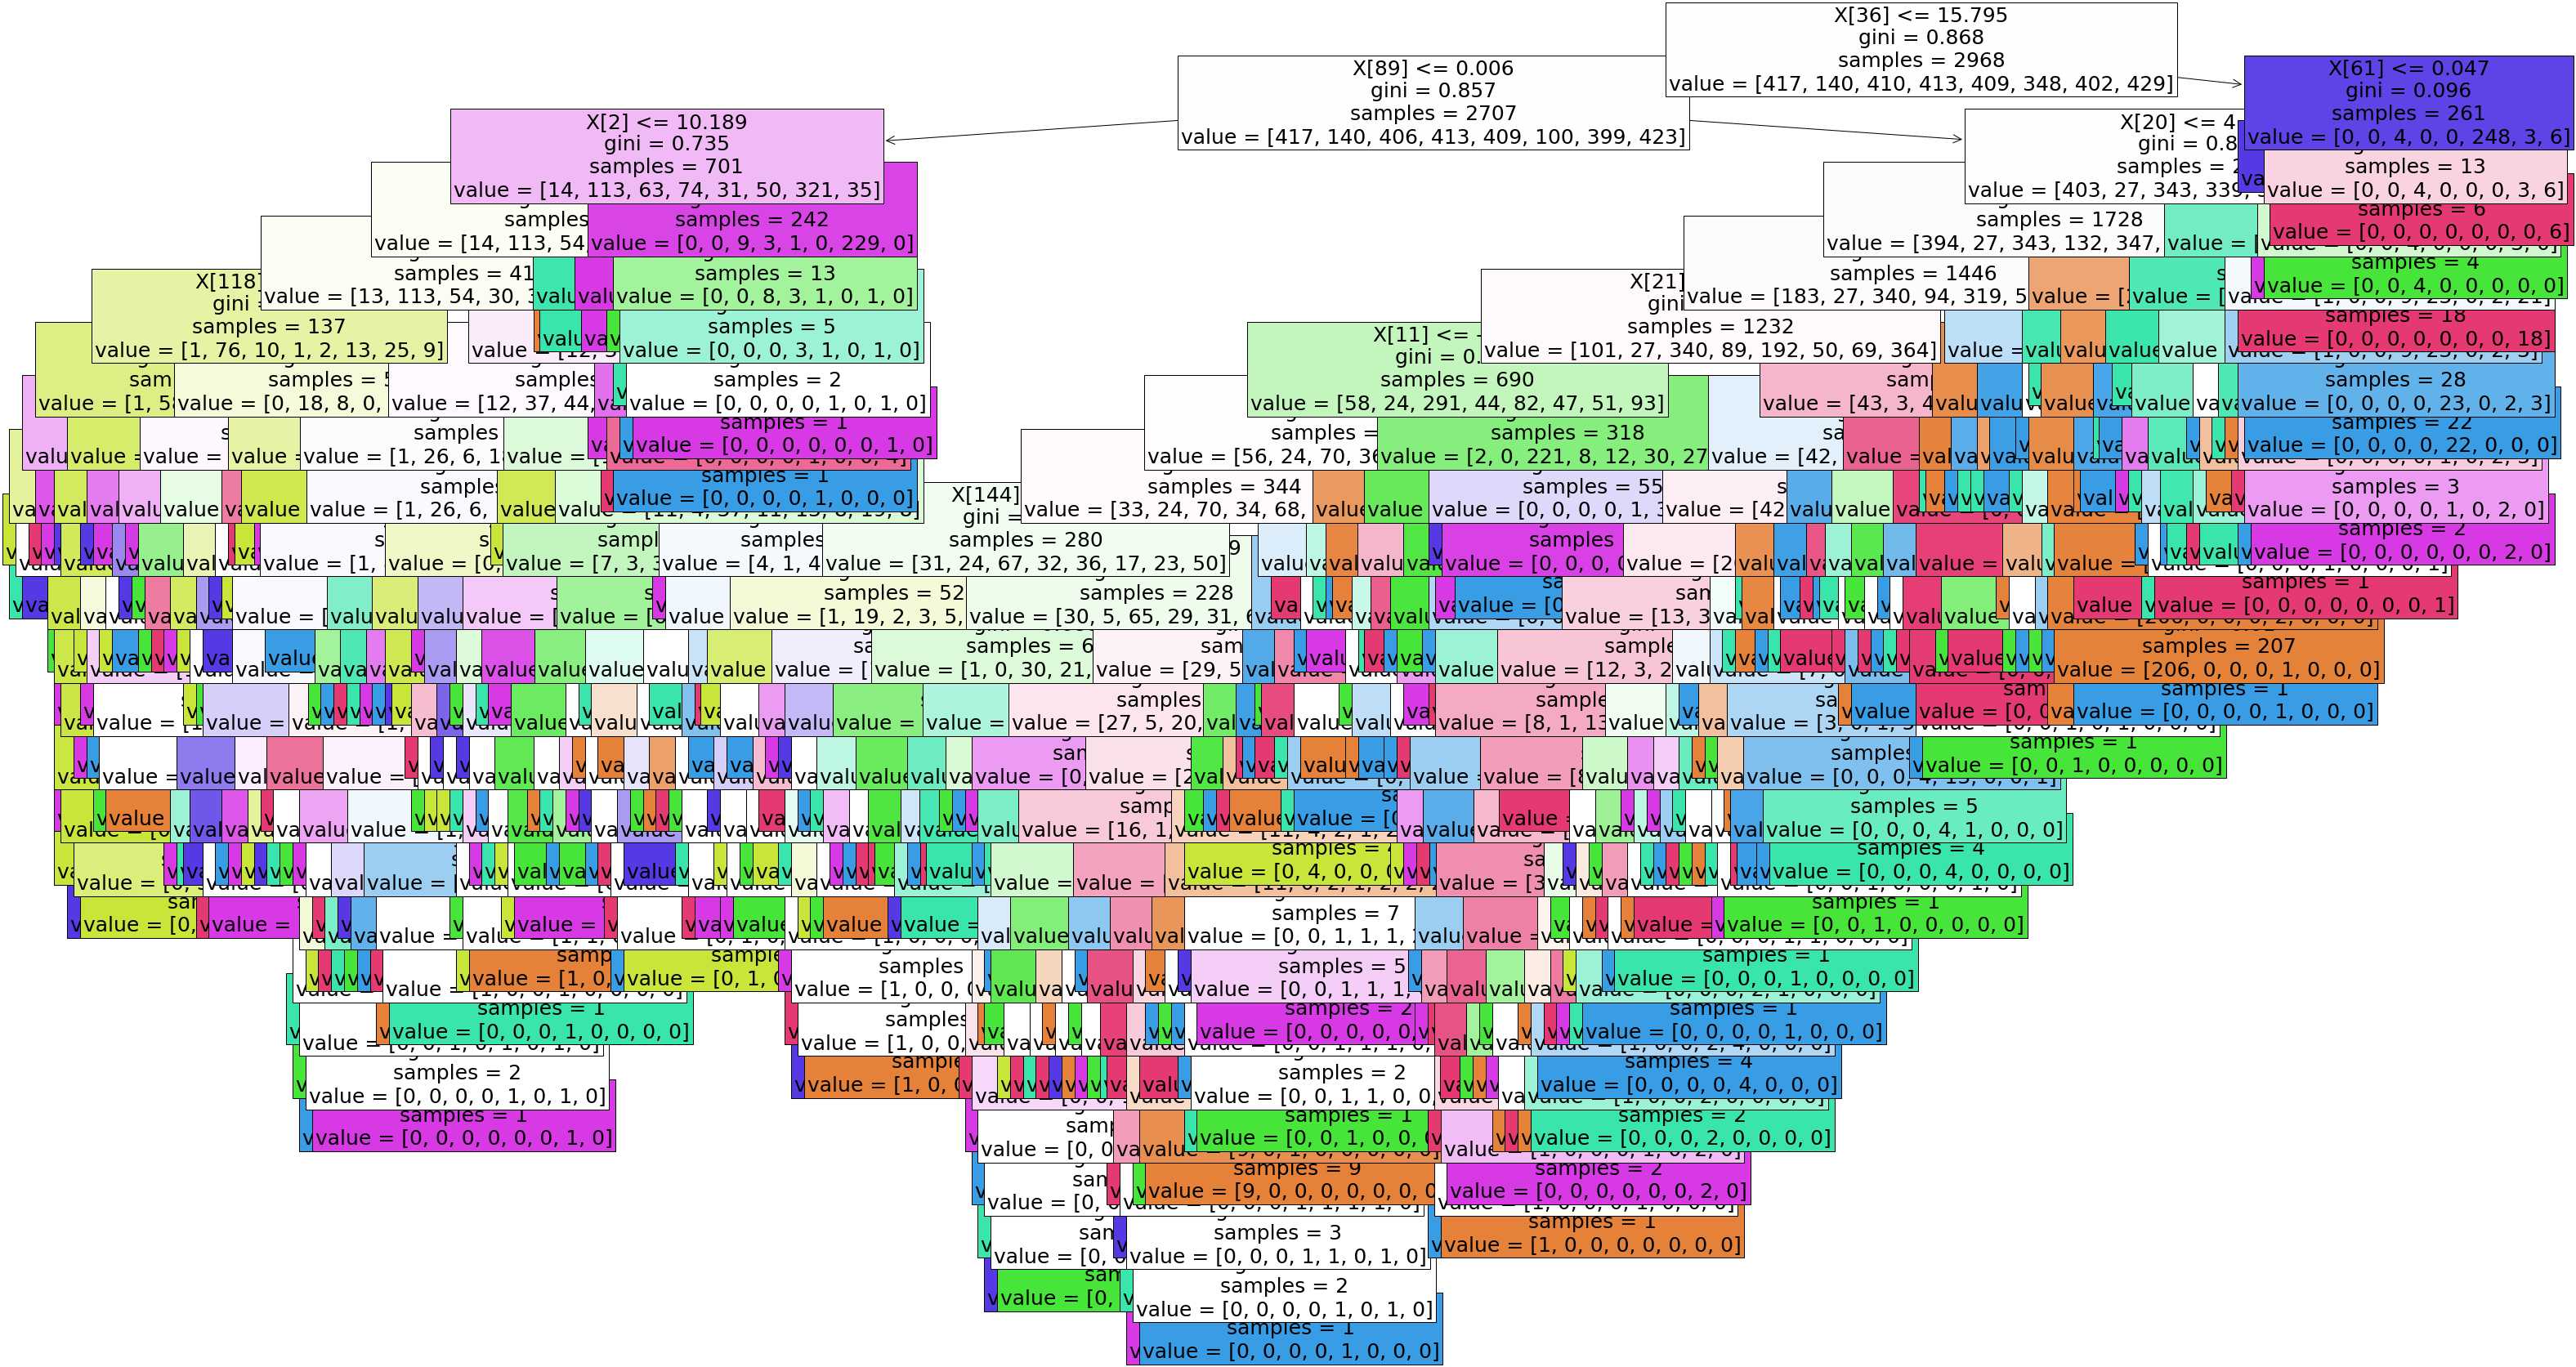

In [52]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(dtree,fontsize=25,filled=True); # filled=True in the plot_tree. When this parameter is set to True the method uses color to indicate the majority of the class.

In [53]:
fig.savefig('ser.png')

EXPORT GRAPHVIZ


In [54]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.tree import export_graphviz
from six import StringIO

In [61]:
from IPython.display import Image
import pydotplus

In [62]:
dot_data = StringIO()
export_graphviz(dtree,out_file = "tree.dot",special_characters=True,rounded = True,filled = True)

In [73]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('graph.png')


^
Expected {'graph' | 'digraph'}  (at char 0), (line:1, col:1)


AttributeError: 'NoneType' object has no attribute 'write_png'

In [70]:
Image(graph.create_png())

AttributeError: 'NoneType' object has no attribute 'create_png'

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree,out_file="tree.dot",rounded=True,special_characters=True,filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('graph.png')
Image(graph.create_png())